## **AI FOR DIABETES RISK**

**📌 About the Project**

Diabetes is a chronic medical condition that affects how the body processes blood glucose (sugar). It is one of the most common non-communicable diseases worldwide, with millions of people affected annually. Early detection of diabetes can play a crucial role in effective treatment and lifestyle changes, potentially reducing the risk of severe health complications.

This project aims to build a machine learning model that can predict whether a person is likely to develop diabetes based on certain health indicators such as glucose level, BMI, insulin level, age, and more. The model is trained on a publicly available dataset and will be evaluated for accuracy and reliability.

### **🎯 Objective**

To develop a supervised machine learning model that can predict the likelihood of diabetes in individuals using health-related features.

#### 📊 Dataset Overview

This dataset contains medical diagnostic data of female patients of at least 21 years of age. It includes 9 columns such as glucose level, blood pressure, BMI, insulin, age, and a target variable `Outcome` indicating whether the patient has diabetes (1) or not (0). The goal is to use these features to build a model that can predict diabetes based on patient health metrics.

Download the dataset from using following link:
https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

In [2]:
import pandas as pd
import numpy as np
import kagglehub
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
import sklearn
# Pretty display for notebooks
%matplotlib inline

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 5.04MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [3]:
import os

data=pd.read_csv(os.path.join(path, 'diabetes.csv'))
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 🧾 Feature Set Exploration

1. **Pregnancies**: Number of times the person has been pregnant. Ranges from **0 to 17**.
2. **Glucose**: Plasma glucose concentration in blood (mg/dL). Ranges from **0 to 199**.
3. **BloodPressure**: Diastolic blood pressure (mm Hg). Values range from **0 to 122 mm Hg**.
4. **SkinThickness**: Thickness of the triceps skin fold (mm), measured using calipers. Ranges from **0 to 99 mm**.
5. **Insulin**: 2-Hour serum insulin (μU/mL). Ranges from **0 to 846 μU/mL**.
6. **BMI**: Body Mass Index, calculated as weight (kg) / height² (m²). Ranges from **0 to 67.1 kg/m²**.
7. **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history. Ranges from **0.078 to 2.42**.
8. **Age**: Age of the person in years. Ranges from **21 to 81**.
9. **Outcome**: Target variable; **1** indicates the person has diabetes, **0** indicates they do not.



In [4]:
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### **Data** **Preparation**

In [5]:
# Check total missing values per column
missing_values = data.isnull().sum()
print("Missing values in each column:\n")
print(missing_values)


Missing values in each column:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
# Count the number of missing values in the Skin Thickness column
print('Number of missing values in Skin Thickness column : ',(data["SkinThickness"] == 0) .sum() )
# Count the number of missing values in the Insulin column
print('Number of missing values in Insulin column : ',(data["Insulin"] == 0) .sum() )
data.loc[data["SkinThickness"] == 0, "SkinThickness"] = data["SkinThickness" ].mean ()
data.loc[data["Insulin"] == 0, "Insulin"] = data["Insulin"].mean()
print((data["SkinThickness"] == 0).sum())
print((data["Insulin"] == 0).sum())


Number of missing values in Skin Thickness column :  227
Number of missing values in Insulin column :  374
0
0


/tmp/ipython-input-6-523622233.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '20.536458333333332' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["SkinThickness"] == 0, "SkinThickness"] = data["SkinThickness" ].mean ()
/tmp/ipython-input-6-523622233.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '79.79947916666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data["Insulin"] == 0, "Insulin"] = data["Insulin"].mean()


In [7]:
n_records = len(data.index)
#Number of records where outcome = 1
n_1 = data[data.Outcome == 1] .shape[0]
#Number of records where outcome = 0
n_0 = data[data.Outcome == 0].shape[ 0]
#Percentage of individuals whose Outcome is 1
n1_perc = (n_1/n_records) *100
# Print the results
print("Total number of records: {}".format(n_records))
print("Number of persons diagonised with diabetes : {}".format (n_1))
print("Number of persons not having diabetes : {}".format(n_0))
print("Percentage of pnople who are Diabetic : {}%".format(n1_perc))


Total number of records: 768
Number of persons diagonised with diabetes : 268
Number of persons not having diabetes : 500
Percentage of pnople who are Diabetic : 34.89583333333333%


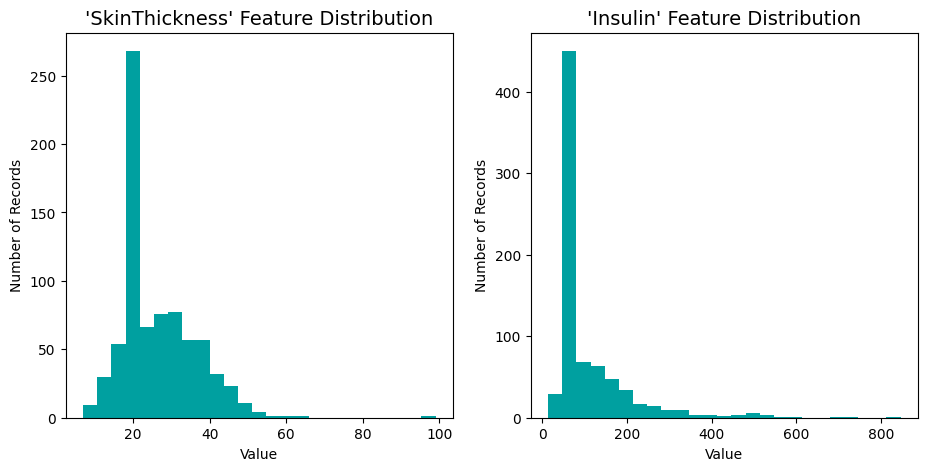

In [8]:
# Split the data into features and target label
outcome_r = data['Outcome' ] #target label
features_r = data.drop('Outcome', axis = 1) #other features
# Visualize skewed continuous features of original data
fig = plt.figure(figsize = (11,5));
# Skewed feature plotting
for i, feature in enumerate(['SkinThickness', 'Insulin']) :
  ax = fig.add_subplot(1, 2, i+1)
  ax.hist(data[feature], bins = 25, color = '#00A0A0')
  ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
  ax.set_xlabel("Value")
  ax.set_ylabel("Number of Records")

In [9]:
import matplotlib.pyplot as plt

def distribution(data, transformed=False):
    """
    Visualization code for displaying skewed distributions of features.
    """

    # Create figure
    fig = plt.figure(figsize=(11, 5))

    # Skewed feature plotting
    for i, feature in enumerate(['SkinThickness', 'Insulin']):
        ax = fig.add_subplot(1, 2, i + 1)
        ax.hist(data[feature], bins=25, color='#00A0A0')
        ax.set_title(f"'{feature}' Feature Distribution", fontsize=14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions", fontsize=16, y=1.03)
    else:
        fig.suptitle("Skewed Distributions", fontsize=16, y=1.03)

    fig.tight_layout()
    plt.show()


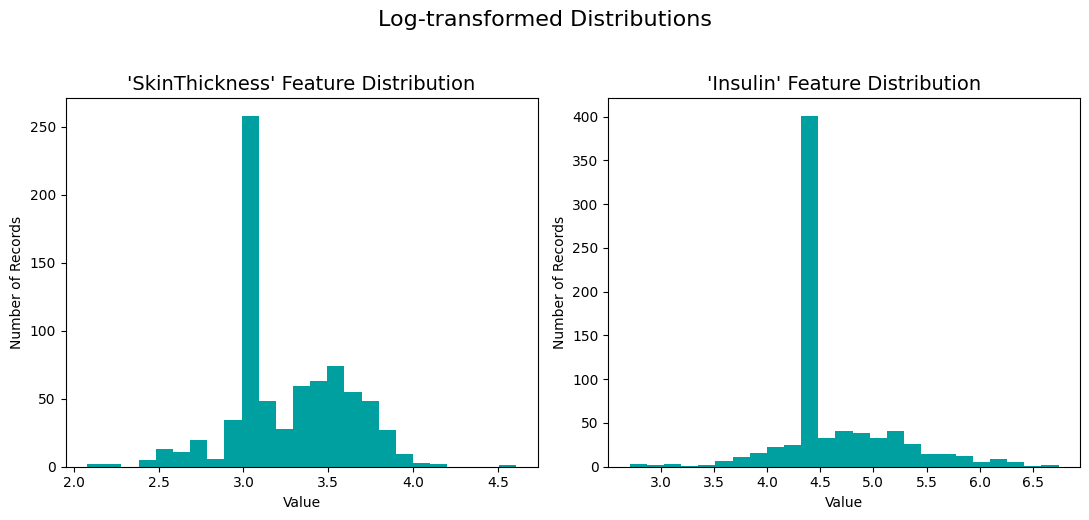

In [10]:
# Log-transform the skewed features
skewed = ['SkinThickness', 'Insulin']
features_log_transformed = pd.DataFrame(data = features_r)
features_log_transformed[skewed]= features_r[skewed].apply(lambda x: np.log(x + 1))
# Visualize the new log distributions
distribution(features_log_transformed, transformed = True)

In [11]:
#Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Insulin', 'SkinThickness', 'DiabetesPedigreeFunction' ]
features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])
# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))
features_final = features_log_minmax_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.595502,0.417468,33.6,0.234415,50
1,1,85,66,0.523317,0.417468,26.6,0.116567,31
2,8,183,64,0.392087,0.417468,23.3,0.253629,32
3,1,89,66,0.434968,0.457607,28.1,0.038002,21
4,0,137,40,0.595502,0.600411,43.1,0.943638,33


## **Training and testing dataset**

In [12]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'outcome_r' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    features_final,
    outcome_r,
    test_size=0.2,
    random_state=42
)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))


Training set has 614 samples.
Testing set has 154 samples.


**Evaluating** **Model** **Performance**

4 different ML algorithms

1.Logistic Regression


2.Decision Trees

3.Random forest

4.Naive Bayes

In [13]:
from time import time
from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    """
    Train and predict using a supervised learning model.

    Inputs:
    - learner: The learning algorithm to be trained and predicted on
    - sample_size: The number of samples to draw from training set
    - X_train, y_train: Training features and labels
    - X_test, y_test: Testing features and labels

    Returns:
    - results: Dictionary with training time, prediction time, and metrics
    """

    results = {}

    # Train the model on a subset of the training data
    start = time()
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time()
    results['train_time'] = end - start

    # Predict on the test set and a subset of the training set
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time()
    results['pred_time'] = end - start

    # Calculate accuracy scores
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)

    # Calculate F-beta scores (beta=0.5 prioritizes precision)
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5, pos_label=1, average='binary')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, pos_label=1, average='binary')

    # Log the result
    print(f"{learner.__class__.__name__} trained on {sample_size} samples.")

    # Return the performance metrics
    return results


In [14]:
# Import the three supervised learning models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the three models
clf_A = LogisticRegression(random_state=42)
clf_B = RandomForestClassifier(random_state=42)
clf_C = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5),random_state=42)

# Calculate the number of samples: 1%, 10%, and 100% of the training data
samples_100 = len(y_train)
samples_10 = int(0.1 * samples_100)
samples_1 = int(0.01 * samples_100)

# Collect results on the learners
results = {}

for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}

    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][samples] = train_predict(clf, samples, X_train, y_train, X_test, y_test)


LogisticRegression trained on 6 samples.
LogisticRegression trained on 61 samples.
LogisticRegression trained on 614 samples.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomForestClassifier trained on 6 samples.
RandomForestClassifier trained on 61 samples.
RandomForestClassifier trained on 614 samples.
AdaBoostClassifier trained on 6 samples.
AdaBoostClassifier trained on 61 samples.
AdaBoostClassifier trained on 614 samples.


In [34]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

def evaluate(results, accuracy, fl):
    """
    Visualization code to display results of various learners.

    inputs:
    - results: dictionary of metrics for each learner
    - accuracy: Accuracy score of naive predictor (for reference lines)
    - fl: F1 score of naive predictor (for reference lines)
    """

    # Create figure
    fig, ax = plt.subplots(2, 3, figsize=(11, 7))

    # Constants
    bar_width = 0.3
    colors = ['#A00000', '#00A0A0', '#00A000']

    # Get the list of sample sizes from the results dictionary (assuming all learners have the same sample sizes)
    sample_sizes = list(next(iter(results.values())).keys())


    # Super loop to plot six panels of data
    for k, learner in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
            for i in np.arange(len(sample_sizes)): # Use the length of sample_sizes
              ax[j // 3, j % 3].bar(i + k * bar_width,results[learner][sample_sizes[i]][metric], width=bar_width, color=colors[k]) # Use sample_sizes[i] as the key
              ax[j // 3, j % 3].set_xticks([0.45, 1.45, 2.45])
              ax[j // 3, j % 3].set_xticklabels(["1%", "10%", "100%"])
              ax[j // 3, j % 3].set_xlabel("Training Set Size")
              ax[j // 3, j % 3].set_xlim((-0.1, 3.0))



    # Add y-labels
    ax[0, 0].set_ylabel("Time (in seconds)")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time (in seconds)")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    # Add titles
    ax[0, 0].set_title("Model Training")
    ax[0, 1].set_title("Accuracy Score on Training Subset")
    ax[0, 2].set_title("F-score on Training Subset")
    ax[1, 0].set_title("Model Predicting")
    ax[1, 1].set_title("Accuracy Score on Testing Set")
    ax[1, 2].set_title("F-score on Testing Set")

    # Horizontal lines for naive predictor
    ax[0, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 1].axhline(y=accuracy, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[0, 2].axhline(y=fl, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')
    ax[1, 2].axhline(y=fl, xmin=-0.1, xmax=3.0, linewidth=1, color='k', linestyle='dashed')

    # Set y-limits for score panels
    ax[0, 1].set_ylim((0, 1))
    ax[0, 2].set_ylim((0, 1))
    ax[1, 1].set_ylim((0, 1))
    ax[1, 2].set_ylim((0, 1))

    # Create legend
    patches = []
    for i, learner in enumerate(results.keys()):
        patches.append(mpatches.Patch(color=colors[i], label=learner))

    plt.legend(handles=patches, bbox_to_anchor=(-.80, 2.53),
               loc='upper center', borderaxespad=0., ncol=3, fontsize='large')

    # Aesthetics
    plt.suptitle("Performance Metrics for Three Supervised Learning Models", fontsize=16, y=1.10)
    plt.tight_layout()
    plt.show()

In [35]:
# Calculate accuracy, precision and recall
accuracy = n_1 / n_records
precision = n_1 / n_records
recall = np.sum(outcome_r) / np.sum(outcome_r)  # This will always be 1, needs correction if used differently

# Calculate F-score using beta = 0.5
beta = 0.5
fscore = (1 + beta**2) * (precision * recall) / ((beta**2 * precision) + recall)

# Print the results
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))


Naive Predictor: [Accuracy score: 0.3490, F-score: 0.4012]


/tmp/ipython-input-34-1790574125.py:76: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


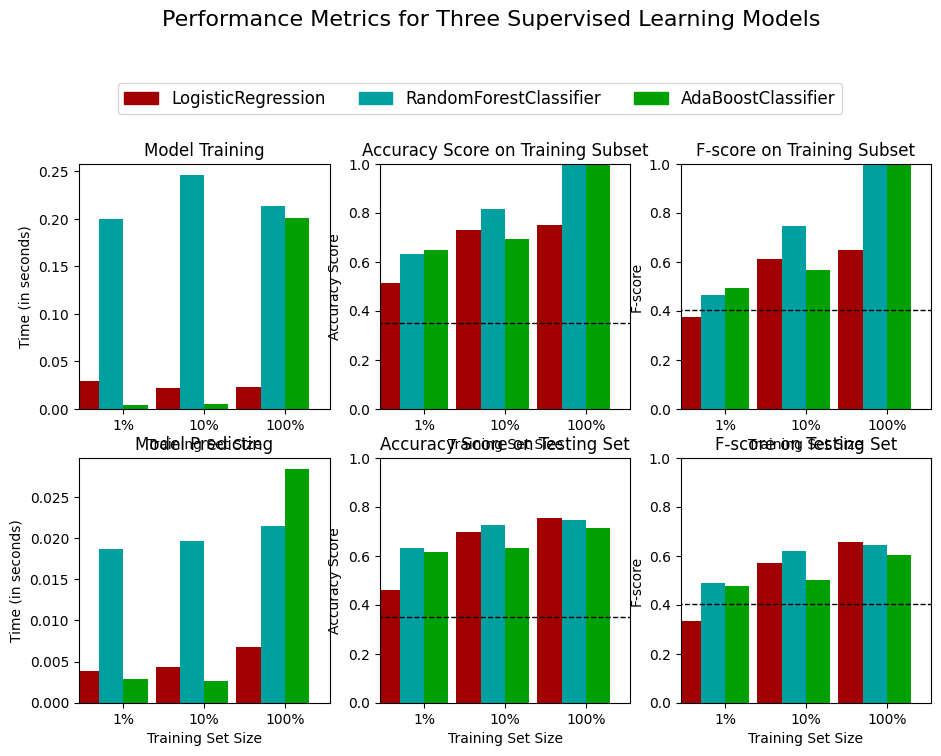

In [36]:
evaluate(results, accuracy, fscore)

# **MT**

In [39]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

# Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# Define the grid of hyperparameters to search
parameters = {'n_estimators': [50, 75, 100, 125],
              'max_depth': [1, 3, 5, 7]}

# Create scoring objects
scorer = make_scorer(fbeta_score, beta=0.5)
acc_scorer = make_scorer(accuracy_score)


grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit to training data
grid_fit = grid_obj.fit(X_train, y_train)
# Get the best estimator for classifier
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and optimized classifiers
predictions = clf.fit(X_train, y_train).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Print the results
print("Random Forest")
print("Unoptimized model accuracy: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Optimized model accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Unoptimized model F-score: {:.4f}".format(fbeta_score(y_test, predictions, beta=0.5)))
print("Optimized model F-score: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))


Random Forest
Unoptimized model accuracy: 0.7468
Optimized model accuracy: 0.7727
Unoptimized model F-score: 0.6452
Optimized model F-score: 0.6863


In [40]:
def feature_plot(importances, X_train, y_train):
    # Display the five most important features
    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices[:5]]
    values = importances[indices][:5]

    # Create the plot
    fig = plt.figure(figsize=(9, 5))
    plt.title("Normalized Weights for First Five Most Predictive Features", fontsize=16)

    # Bar for individual feature weights
    plt.bar(np.arange(5), values, width=0.6, align="center", color='#00A000',
            label="Feature Weight")

    # Bar for cumulative feature weights
    plt.bar(np.arange(5) - 0.3, np.cumsum(values), width=0.2, align="center",
            color='#00A0A0', label="Cumulative Feature Weight")

    # Axes and labels
    plt.xticks(np.arange(5), columns)
    plt.xlim((-0.5, 4.5))
    plt.ylabel("Weight", fontsize=12)
    plt.xlabel("Feature", fontsize=12)
    plt.legend(loc='upper center')
    plt.tight_layout()
    plt.show()


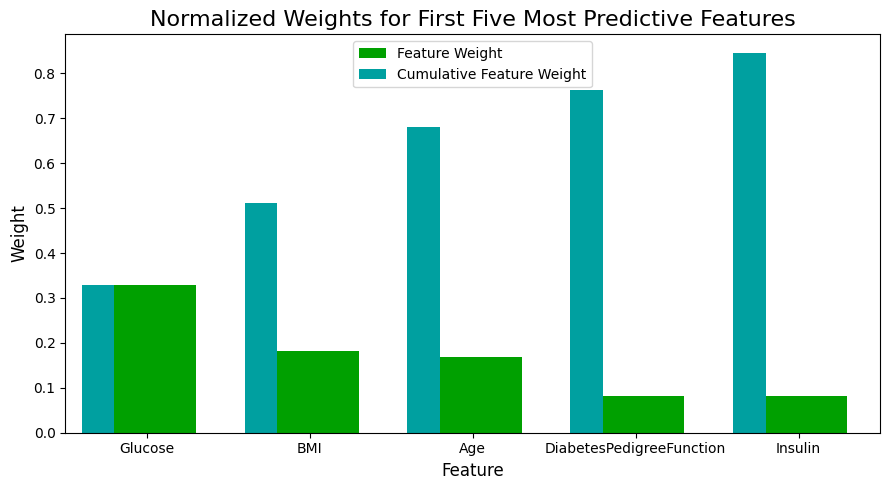

In [41]:
from sklearn.ensemble import RandomForestClassifier
model=best_clf
importances = model.feature_importances_
feature_plot(importances, X_train, y_train)

**Feature** **selection**

In [42]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space to top 3 important features
top_3_features = X_train.columns.values[np.argsort(importances)[::-1][:3]]
X_train_reduced = X_train[top_3_features]
X_test_reduced = X_test[top_3_features]

# Train on the best model found from grid search earlier
clf = clone(best_clf).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))

print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta=0.5)))


Final Model trained on full data
------
Accuracy on testing data: 0.7727
F-score on testing data: 0.6863

Final Model trained on reduced data
------
Accuracy on testing data: 0.7662
F-score on testing data: 0.6727
